In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Walmart Sales Project/data/Walmart.csv')

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.isnull().any()
#No null values in all columns

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) #Convert the type of Date to datetime
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

## **Univariate Analysis**

In [ ]:
df['Date'].nunique()

143

In [ ]:
len(df['Store'].value_counts())

45

In [ ]:
df['Date'].value_counts().sort_index()

2010-02-05    45
2010-02-12    45
2010-02-19    45
2010-02-26    45
2010-03-05    45
              ..
2012-09-28    45
2012-10-05    45
2012-10-12    45
2012-10-19    45
2012-10-26    45
Name: Date, Length: 143, dtype: int64

The dataset contains weekly sales data of 45 Walmart stores in 143 weeks from 2010-02-05 to 2012-10-26. 

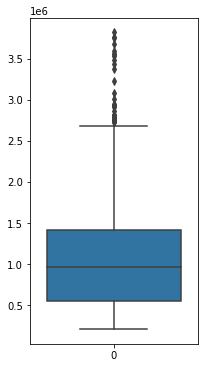

In [ ]:
plt.figure(figsize=(3,6))
sns.boxplot(data = df['Weekly_Sales'])

In [ ]:
df['Weekly_Sales'].describe().apply(lambda x : "{:f}".format(x))

count       6435.000000
mean     1046964.877562
std       564366.622054
min       209986.250000
25%       553350.105000
50%       960746.040000
75%      1420158.660000
max      3818686.450000
Name: Weekly_Sales, dtype: object

the mean weekly sales is 1046964. std is moderate. 

In [ ]:
df['Day'] = df['Date'].dt.weekday
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year

Text(0.5, 1.0, 'Unemployment')

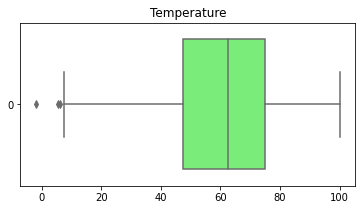

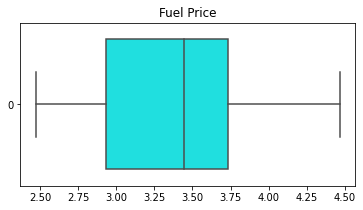

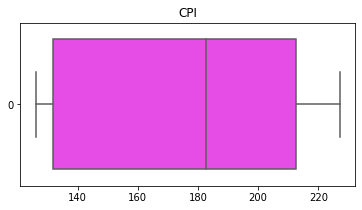

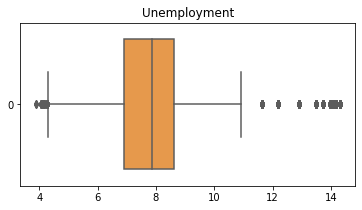

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(data = df['Temperature'], orient="h",color='#66FF66')
plt.title('Temperature')
plt.figure(figsize=(6,3))
sns.boxplot(data = df['Fuel_Price'], orient="h",color='#00FFFF')
plt.title('Fuel Price')
plt.figure(figsize=(6,3))
sns.boxplot(data = df['CPI'], orient="h",color='#FF33FF')
plt.title('CPI')
plt.figure(figsize=(6,3))
sns.boxplot(data = df['Unemployment'],orient="h" ,color='#FF9933')
plt.title('Unemployment')

* Temperature has the range from around 10 to 100, probably beause of the seasonal change throughout the whole year and geographical location of the stores.
* Fuel price has a mean of 3.4 and distribution concentrates mostly between 3 and 3.75.
* CPI has a quite dispersed distribution with large interquantile range.
* Umeployment has a less dispersed disribution but a higher number of outliers.

##Bivariate Analysis

Text(0, 0.5, 'Weekly_Sales')

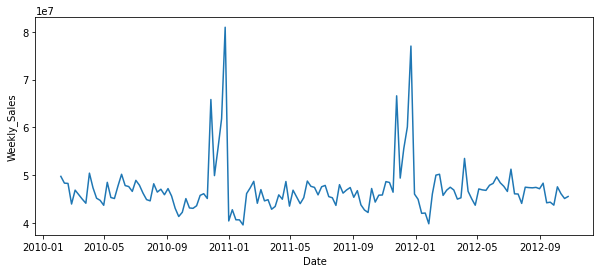

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df.groupby('Date')['Weekly_Sales'].sum())
plt.xlabel("Date") 
plt.ylabel("Weekly_Sales") 

Obvious surge at the end of the 2010 and 2011, probably due to Thanksgiving and Christmas, which most US people celebrate.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Top 10 Sales by Store')]

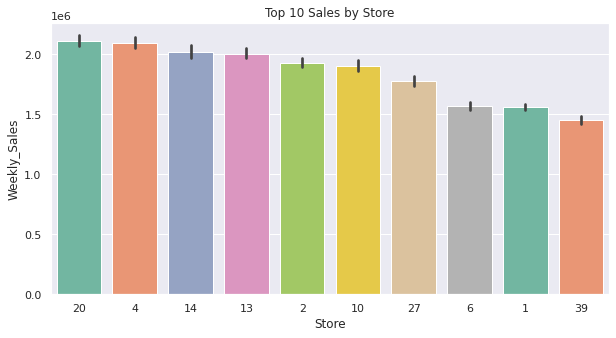

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
order = df.groupby(["Store"])["Weekly_Sales"].sum().sort_values().tail(10).index[::-1]

sns.barplot(df['Store'], df['Weekly_Sales'], order = order, palette = "Set2").set(title='Top 10 Sales by Store')

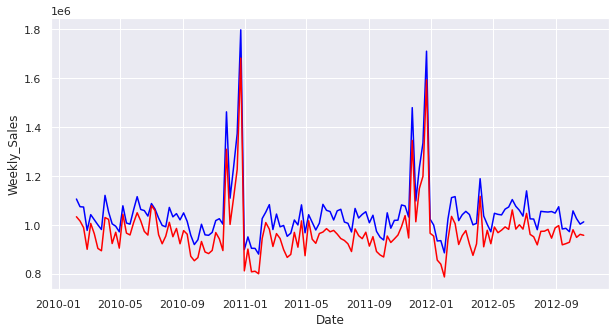

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df.groupby('Date')[['Weekly_Sales']].mean(), x = 'Date' , y = 'Weekly_Sales', color = 'blue')
sns.lineplot(data = df.groupby('Date')[['Weekly_Sales']].median(), x = 'Date' , y = 'Weekly_Sales', color = 'red')

The difference between mean and median also shows the sales of different stores may vary a lot.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

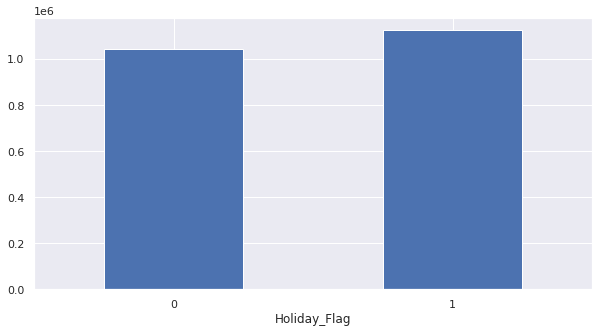

In [ ]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean().plot.bar()
plt.xticks(rotation = 'horizontal')

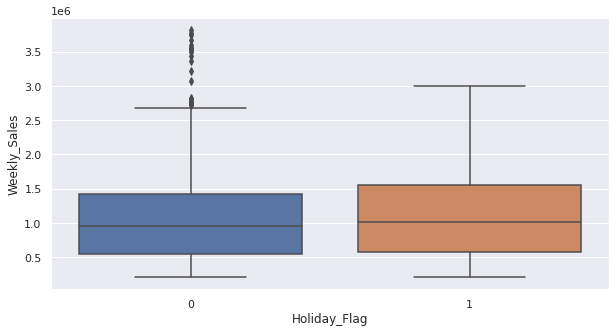

In [ ]:
sns.boxplot(data = df, x = 'Holiday_Flag', y = 'Weekly_Sales')

* Holiday weeks have a higher mean but not significant. 
* Non-holiday weeks have a number of outliers with much higher sales.

We may conclude Holiday is one of the factors causing higher sales, but not the only factor.

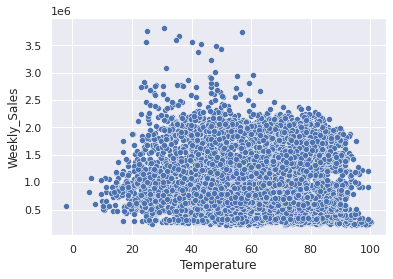

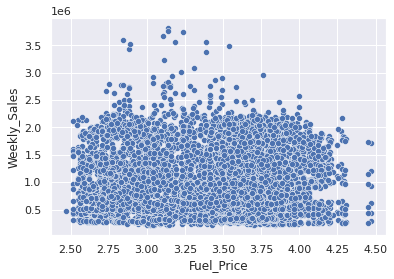

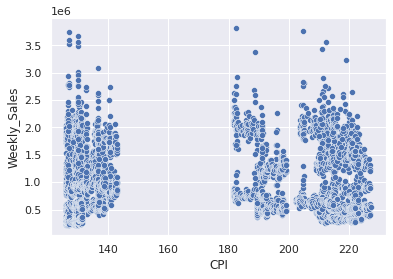

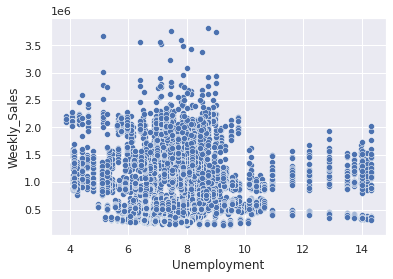

In [ ]:
for i in ['Temperature','Fuel_Price','CPI','Unemployment']:
  plt.figure(figsize=(6,4))
  sns.scatterplot(x = df[i] , y = df['Weekly_Sales'])


All these features show no obvious positive/negative relationship with Weekly Sales. However, we can notice that Weekly Sales are low when the temperature is very low. (People tend not to do grocery in very cold weather)
Similar case, When unemployment rate is very high, the mean weakly sales is lower.